In [19]:
#!/usr/bin/python3

#Authors		: Ravisutha Sakrepatna Srinivasamurthy
#                 Muaz Ahmed
#Project	: Red Black Trees

import random
from collections import deque
import matplotlib.pyplot as plt
from pylab import rcParams

class RedBlackTrees:
    """ Red Black Trees implementation. 
    
    Example:
    tree = RedBlackTrees ()
    #To insert 
    tree.insert (value)
    #To delete
    tree.delete(value)
    """

    def __init__ (self, data=None):
        """ Initialize the tree. """

        if (data != None):
            self.root = self.Node (data)
        else:
            self.root = None

    class Node:
        """Creates a node object for tree implementation. """

        def __init__ (self, data, left=None, right=None, color=None):
            """ Node has data and color information with two children. """

            self.data = data
            self.left = left
            self.right = right
            self.color = color
            self.parent = None 

    def search (self, data):
        """ Searches for given data in the red-black trees. 
        Parameters:
        ----------
        data: Value which you want to search

        Returns:
        -------
        True: If the given value is present
        False: If the value is absent
        """

        #If tree is non-existant
        if (self.root == None):
            return False

        root = self.root

        #Loop till you find the node
        while (root.data != data):
            if (data < root.data):
                if (root.left):
                    root = root.left
                else:
                    return False
            elif (data > root.data):
                if (root.right):
                    root = root.right
                else:
                    return False
        return True

    def _insert (self, new_node, root):
        """ Internal implementation of insert. """

        #New value same as root
        if (new_node.data == root.data):
            return False

        #New value less than root
        elif (new_node.data < root.data):
            if (root.left):
                return (self._insert (new_node, root.left))
            else:
                root.left = new_node

        #New value greater than root
        else:
            if (root.right):
                return (self._insert (new_node, root.right))
            else:
                root.right = new_node

        new_node.parent = root
        return True

    def insert (self, data):
        """ Insert a node into the tree. 
        Parameters:
        ----------
        data: Data to be inserted.
        Returns:
        -------
        True: Sucessfully inserted
        False: Couln't insert as the data is already present.
        """

        new_node = self.Node (data)

        if (self.root == None):
            self.root = new_node
            new_node.color = 'black'
            return True

        else:
            new_node.color = 'red'	
            if (self._insert (new_node, self.root) == True):
                #Fix the inbalances
                self._fix_insert (new_node)
                return True

            else:
                return False

    def _uncle (self, node):
        """ Finds the uncle of a given node. 
        Parameter: 
        ---------
        node: Node for which uncle node is to found.
        Returns:
        -------
        Uncle node or False in case uncle node is absent"""

        gp = self._grand_parent (node)

        if (gp == None):
            return None

        #If the given node is on right, left child of gp is the uncle
        if (gp.left == node.parent):
            if (gp.right):
                """ If uncle exists. """
                return (gp.right)
            else:
                """ If uncle is absent, then send None node. """
                u = self.Node (None)
                u.color = 'black'
                return (u)

        elif (gp.right == node.parent):
            if (gp.left):
                return (gp.left)
            else:
                u = self.Node (None)
                u.color = 'black'
                return (u)

        else:
            raise Exception ("Something's wrong with the given node with data: {}".format (node.data))

    def _grand_parent (self, node):
        """ Finds grand parent of a given node.
        Parameter:
        ---------
        node: Node for which grand parent has to be found.
        Returns:
        -------
        Grand parent or False in case grand parent is absent. """

        if (node.parent != None):
            if (node.parent.parent != None):
                return (node.parent.parent)
            else:
                return False
        else:
            return False

    def side (self, node):
        """ Checks the formation of given node.
        Parameter:
        ---------
        node: Node for which formation information is required.
        Returns:
        -------
        Formation Type: 'triangle_left',
                        'trinagle_right',
                        'line_left',
                        'line_right'
        """

        if (node.parent.left == node):
            """ Left child. (Z on left side)"""
            if (node.parent.parent.left == node.parent):
                """Left Line formation (line_left).
                        X
                       /
                      Y
                     /
                    Z
                """
                return ('line_left')
            elif (node.parent.parent.right == node.parent):
                """Right Triangle formation (triangle_left).
                        X
                         \ 
                          Y
                         /
                        Z    
                """
                return ('triangle_left')
            else:
                raise Exception ("Something wrong with side function") 

        elif (node.parent.right == node):
            """ Right child. (Z on right side)"""
            if (node.parent.parent.right == node.parent):
                """Right Line formation. (line_right)
                        X
                         \
                          Y
                           \
                            Z
                """
                return ('line_right')
            elif (node.parent.parent.left == node.parent):
                """Left Triangle formation (traingle_right).
                        X
                       /
                      Y
                       \
                        Z
                """
                return ('triangle_right')
            else:
                raise Exception ("Something wrong with side function") 

        else:
            raise Exception ("Something wrong with side function") 

    def _fix_insert (self, node):
        """ Fixes the inbalances in RBT. """

        while (node == self.root or node.parent.color == 'red'):

            #Case 0: Trivial case
            if (node == self.root):
                node.color = 'black'
                break

            uncle = self._uncle (node)

            #Case 0: Another trivial case
            if (uncle == None):
                break

            parent = node.parent
            gp = self._grand_parent (node)

            #Case 1: If uncle is red
            if (uncle.color == 'red'):
                uncle.color = 'black'
                parent.color = 'black'
                gp.color = 'red'

                #Fix up grand parent's color in next iteration
                node = gp 

            #Uncle color is black
            else:
                #Case 2: Triangle Formation (Convert Triangle formation into line formation)
                if (self.side (node) == 'triangle_left'):
                    self.right_rotation (parent)
                    node = node.right
                elif (self.side (node) == 'triangle_right'):
                    self.left_rotation (parent)
                    node = node.left

                #Case 3: Line Formation (Rotate in opposite direction to the node-parent direction)
                elif (self.side (node) == 'line_left'):
                    self.right_rotation (gp)

                    temp_color = parent.color
                    parent.color = gp.color
                    gp.color = temp_color

                elif (self.side (node) == 'line_right'):
                    self.left_rotation (gp)

                    temp_color = parent.color
                    parent.color = gp.color
                    gp.color = temp_color

    def left_rotation (self, node, color=None):
        """ Left rotation on a node. 
        Parameters:
        ----------
        node: Left rotation will be applied on this node
        Returns:
        -------
        Nothing
        Example Usage: left_rotation (X)
             X                                Y
            / \      Left Rotate             / \
           A   Y     ---------->            X   C
              / \                          / \
             B   C                        A   B
        """

        #Shift X to left
        if (node.right):
            pre_parent = node.parent
            node.right.parent = pre_parent

            #Node Y becomes the parent of X
            node.parent = node.right

            #Determine the subtree from parents
            #Check if parent exists
            if (pre_parent != None):
                if (pre_parent.right != None and pre_parent.right.data == node.data):
                    """ Right subtree from parent. """
                    pre_parent.right = node.parent

                elif (pre_parent.left != None and pre_parent.left.data == node.data):
                    """ Left subtree from parent. """
                    pre_parent.left = node.parent
            
            #Shift left child/children of Y to as right child/children of X 
            node.right = node.parent.left
            if (node.parent.left != None):
                node.parent.left.parent = node

            #X becomes Y's left child
            node.parent.left = node
            if (node == self.root):
                self.root = node.parent
                
        if (color != None):
            if (color == 1):
                node.color = 'red'
                node.parent.color ='black'
            elif (color == 2):
                if (node.parent.right != None):
                    node.parent.right.color = node.color

    def right_rotation (self, node, color=None):
        """ Implements right rotation. 
        Parameters:
        ----------
        node: Left rotation will be applied on this node
        Returns:
        -------
        Nothing
        Example Usage: right_rotation (Y)
            Y                           X
           / \     Right Rotate        / \
          X   C    ------------>      A   Y
         / \                             / \
        A   B                           B   C
        """
        #Shift Y to right
        if (node.left):
            pre_parent = node.parent
            node.left.parent = pre_parent

            #Node X becomes the parent of Y
            node.parent = node.left

            #Determine the subtree from parents
            #Check if parent exists
            if (pre_parent != None):
                if (pre_parent.right != None and pre_parent.right.data == node.data):
                    """ Right subtree from parent. """
                    pre_parent.right = node.parent

                elif (pre_parent.left != None and pre_parent.left.data == node.data):
                    """ Left subtree from parent. """
                    pre_parent.left = node.parent
            
            #Shift right child/children of X to as left child/children of Y 
            node.left = node.parent.right
            if (node.parent.right != None):
                node.parent.right.parent = node

            #Y becomes X's right child
            node.parent.right = node
            if (node == self.root):
                self.root = node.parent
                
        if (color != None):
            if (color == 1):
                node.color = 'red'
                node.parent.color ='black'
            elif (color == 2):
                if (node.parent.left != None):
                    node.parent.left.color = node.color
                    

    # create a graphical representation of a binary tree (plot_tree uses plot_node)
    def _plot_node(self, node, level = 1, posx = 0, posy = 0):
        """Given the root, plots the whole tree."""
        
        width = 2000.0 * (0.5**(level))
        plt.text(posx, posy, str(node.data), fontdict=dict(color=node.color), horizontalalignment='center',fontsize=10)
                    
        if node.left:
            px = [posx, posx-width]
            py = [posy-2, posy-15]
            plt.plot(px,py,'b-')
            self._plot_node(node.left, level+1, posx-width, posy-20)
            
        if node.right:
            self._plot_node(node.right, level+1, posx+width, posy-20)
            px = [posx, posx+width]
            py = [posy-2, posy-15]
            plt.plot(px,py,'b-')

    def plot_tree(self, node, figsize=(10,6)):
        rcParams['figure.figsize'] = figsize
        fig, ax = plt.subplots()
        ax.axis('off')
        self._plot_node(node)
        plt.show()

    def print_tree (self):
        q = deque () 
        q.append ((self.root, 0))

        print ()
        while (len (q) > 0):
            (root, level) = q.pop ()
            print (" " * level, root.data, "(", root.color, ")")
            level += 1
            if (root.left):
                q.append ((root.left, level))

            if (root.right):
                q.append ((root.right, level))
        print ()
                
    def _black_count (self, root):
        """ Helper function to check the integrity of the RBT. """

        if (root.left != None):
            left_total = self._black_count (root.left)
        else:
            left_total = 0

        if (root.right != None):
            right_total = self._black_count (root.right)
        else:
            right_total = 0
        
        if (right_total == -1 or left_total == -1):
            return -1
                
        if (left_total != right_total):
            print ("Check Failed for root {}".format (root.data))
            return -1
        else:
            if (root.color == 'black'):
                return (left_total + 1)
            else:
                return (left_total)    
    
    def _red_nodes_check (self):
        """Checks for consequtive red nodes and if BST properties are satisfied.
        Parameters:
        ----------
        None
        Returns:
        True if no two consequtive red nodes and BST conditions are satisfied. 
        Returns -1 if consequtive nodes are red.
        Returns -2 if BST properties are not met. """
        
        q = deque ()
        
        q.append (self.root)
        
        while (len (q)):
            root = q.pop ()
            
            if (root.left):
                #Check for BST conditions
                if (root.data < root.left.data):
                    return -2
                
                #Check if left child has same color as root    
                q.append (root.left)
                if (root.color == root.left.color):
                    if (root.color == 'red'):
                        return -1
                    
            if (root.right):
                #Check for BST properties
                if (root.data > root.right.data):
                    return -2
                
                #Check if the right child has same color as root
                q.append (root.right)
                if (root.color == root.right.color):
                    if (root.color == 'red'):
                        return -1

            
    def integrity_check (self, debug=True):
        """Does integrity check for red black tree properties. Three types of integrity checks are
        1. Number of black nodes in each path
        2. If two consequtive red nodes present in the tree
        3. Left node is smaller than the root and right node is greater than the root
        Parameters: 
        ----------
        None
        Returns:
        -------
        True if the tree passes integrity check else False
        """
        
        #Number of black nodes in each path
        first_check = self._black_count (self.root)
        if (first_check == -1 or first_check == -2):
            if (debug):
                print ("Check Failed: Number of Black Nodes not same in every path")
            return False
        else:
            if (debug):
                pass
                #print ("Check Passed: Same number of black nodes in each path")
        
        if (self._red_nodes_check () == False):
            if (debug):
                print ("Check Failed: Two consequtive red nodes found")
            return False
        else:
            if (debug):
                pass
                #print ("Check Passed: No two consequtive red nodes found")
        
        return True
    
    def double_black(self,node):
        """Removes double black condition from a node during delete operation
        Parameters:
        ----------
        None
        Returns:
        -------
        None
        """
        if node.parent == None:
            return
        left = 0
        if node.parent.left != node:
            sibling = node.parent.left
            left = 1
        else:
            sibling = node.parent.right
            left = 0
        if sibling != None:          
            if not left:
                """Case for right sibling of double black"""          
                if sibling.color == 'red':#sibling is red
                    """Case 1, sibling is red"""
                    sibling.parent.color = 'red'#perform recoloring and rotation
                    sibling.color = 'black'
                    self.left_rotation(sibling.parent)
                    self.double_black(node)#recurse to next case of double black
                
                elif sibling.color == 'black':#sibling is black
                  
                    if self._color(sibling.right) == 'red': 
                        """Case 2, sibling is black and sibling right child is red"""
                        sibling.right.color = 'black'
                        cc = sibling.color
                        sibling.color = sibling.parent.color
                        sibling.parent.color = cc
                        self.left_rotation(sibling.parent)
                
                    elif self._color(sibling.left) == 'red':
                        """Case 3, sibling is black and sibling right child is red"""
                        sibling.color = sibling.left.color
                        sibling.left.color = 'black'
                        self.right_rotation(sibling)
                        self.double_black(node)#recurse to next case of double black 
                    else:
                        """Case 4, sibling is black and both sibling's children are black"""
                        sibling.color = 'red'
                        if sibling.parent.color == 'black':
                            self.double_black(node.parent)
                        else:
                            sibling.parent.color = 'black'
            
            else:
                """Case for left sibling double black, mirror of right case"""
                if sibling.color == 'red':
                    node.parent.color = 'red'
                    sibling.color = 'black'
                    self.right_rotation(sibling.parent)
                    self.double_black(node)
                elif sibling.color == 'black':
                    if self._color(sibling.left) == 'red':
                        sibling.left.color = 'black'
                        cc = sibling.color
                        sibling.color = sibling.parent.color
                        sibling.parent.color = cc
                        self.right_rotation(sibling.parent)
                    elif self._color(sibling.right) == 'red':
                        sibling.right.color = 'black'
                        sibling.color = 'red'
                        self.left_rotation(sibling)
                        self.double_black(node)
                    else:
                        sibling.color = 'red'
                        if sibling.parent.color == 'black':
                            self.double_black(node.parent)
                        else:
                            sibling.parent.color = 'black'
                        
           
    def removedb(self,node):
        """Handles special delete cases specific to red-black tree 
        Parameters: 
        ----------
        node: node to be deleted
        Returns:
        -------
        None
        """
        if node == None or node.parent == None: #if current node is root
            return
        if node.parent.right != node: #this is the sibling and it is the right child
            """Cases when sibling is the right child"""
            
            sibling = node.parent.right
            if (sibling == None):
                return
            if sibling.color == 'black':# if sibling is black
                """Cases when sibling is black"""
                if self._color(sibling.right) == 'red': #this is a right right -> left rotation
                    self.left_rotation(sibling.parent,2)
                elif self._color(sibling.left) == 'red':#this is a right left -> right->left rotation
                    self.right_rotation(sibling,1)
                    self.left_rotation(sibling.parent.parent,2)
                else:# both children are black
                    #node.color = 'red'
                    if sibling != None:
                        sibling.color = 'red'
                    if node.parent.color == 'red':
                        node.parent.color = 'black'
                    else:
                        self.double_black(node.parent)                    
            else: #
                """Cases when sibling is red"""
                self.double_black(node)
            self._replace_child(node,node.right)#remove the node
                            
        elif node.parent.left != node: # this is the sibling and it is the left child
            """Cases when the sibling is the left child (mirror of left cases)"""
            
            sibling = node.parent.left
            if sibling.color == 'black': # if sibling is black
                if self._color(sibling.left) == 'red':#this is a left left -> right rotation
                    self.right_rotation(sibling.parent,2)
                elif self._color(sibling.right) == 'red':#this is a left right->left -> right rotation
                    self.left_rotation(sibling,1)
                    self.right_rotation(sibling.parent.parent,2)
                else: #both children are black
                    if sibling != None:
                        sibling.color = 'red'
                    if node.parent.color == 'red':
                        node.parent.color = 'black'
                    else:#parent is black recurse
                        self.double_black(node.parent)
                        pass
            else: #sibling is not black
                self.double_black(node)
            self._replace_child(node,node.right)
                
        return node.parent
    
    def _search(self,root,data):
        """Internal function, returns a node containing data 
        Parameters: 
        ----------
        root: parent to begin search from
        data: value searched for
        Returns:
        -------
        node if found, else None
        """
        if root == None:
            return None
        if root.data == data:
            return root
        if data > root.data:
            return self._search(root.right,data)
        else:
            return self._search(root.left,data)
    
    def _replace_child(self,old, new):
        """Replaces node old with node new 
        Parameters: 
        ----------
        old: existing node to be replaced
        new: node to replace old with
        
        Returns:
        -------
        None
        """
        if old.parent==None:
            self.root = new
        elif old.parent.left == old:
            old.parent.left = new
        elif old.parent.right == old:
            old.parent.right = new
        else:
            assert(false)
        if new != None:
            new.parent = old.parent
            
    def _max_sub_node(self,node):
        """Returns predecessor of a node 
        Parameters: 
        ----------
        node: node whose predecessor is required
        Returns:
        -------
        predecessor node
        """
        if node.right == None:
            return node
        return self._max_sub_node(node.right)
    
    def _color(self,node):
        """Returns color of a node 
        Parameters: 
        ----------
        node: node whose color is required
        Returns:
        -------
        color of node if not NULL, else 'black'
        """
        if node == None:
            return 'black'
        return node.color
    
    def _delete_node(self,root,data):
        """Internal delete function, deletes node containing data and restores red black tree properties 
        Parameters: 
        ----------
        root: node to start from
        data: value to be deleted from the tree
        Returns:
        -------
        True if node found, else False
        """
        node = self._search(root,data) #find node to be deleted
        if node != None:
            if node.left == None:
                """Delete case with no left child"""
                if self._color(node) == 'black' and self._color(node.right) == 'black':
                    """Special delete case, node to be deleted and its right child are black"""

                    self.double_black(node)
                else:
                    if node.right != None:
                        node.right.color = 'black'
                self._replace_child(node,node.right)
            elif node.right == None:
                """Delete case, node to be deleted has left child but no right child """
                if self._color(node) == 'black' and self._color(node.left) == 'black': #node and child are black
                    
                    """Special delete case, node to be deleted and left child are black"""
                    self.double_black(node)#Handles special red black tree cases
                else:
                    """Delete case, either node to be deleted or its right child are red """
                    if node.left != None:
                        node.left.color = 'black'
                self._replace_child(node,node.left)
            else: # node has two children:
                """Delete case, node to be deleted has both children,
                replace node with its predecessor and recurse to delete predecessor"""
                _max = self._max_sub_node(node.left)
                node.data = _max.data
                self._delete_node(node.left,_max.data)
                
            return True
        else:
            return False
    

    def delete(self, obj):
        """ Delete obj from the BST if it is contained 
        Parameters:
        ----------
        obj: value which you want to delete
        Returns:
        -------
        None
        """
        if self.root == None:
            return
        self._delete_node(self.root, obj)        

In [20]:
import unittest, sys

class Tester(unittest.TestCase):
    def test_left_rotation(self):
        tree = RedBlackTrees()
        for i in [1,5,2]:
            tree.insert(i)
        self.assertEqual(tree.root.data, 2)
        self.assertEqual(tree.root.right.data,5)
        self.assertEqual(tree.root.right.color, 'red')
        self.assertEqual(tree.root.left.color, 'red')
        self.assertEqual(tree.root.left.data,1)
        
    def test_recolor(self):
        tree = RedBlackTrees()
        for i in [1,5,2,4,0]:
            tree.insert(i)
        node = tree._search(tree.root,0)
        self.assertEqual(node.color,'red')
        self.assertEqual(node.parent.data,1)
        self.assertEqual(node.parent.color,'black')
        self.assertEqual(node.parent.parent.right.data,5)
        self.assertEqual(node.parent.parent.right.color,'black')
    def test_right_rotation(self):
        tree = RedBlackTrees()
        for i in [1,5,2,4,0,3]:
            tree.insert(i)
        node = tree._search(tree.root,4)
        self.assertEqual(tree.root.data, 2)
        self.assertEqual(node.parent,tree.root)
        self.assertEqual(node.right.color, 'red')
        self.assertEqual(node.left.color, 'red')
        self.assertEqual(node.left.data,3)
        self.assertEqual(node.right.data,5)
    def test_delete_cas1(self):
        tree = RedBlackTrees()
        for i in [1,5,2,4,0,3]:
            tree.insert(i)
        tree.delete(1)
        node = tree._search(tree.root,0)
        self.assertEqual(tree.root.data, 2)
        self.assertEqual(node.parent,tree.root)
        self.assertEqual(node.right, None)
        self.assertEqual(node.left, None)
    def test_delete_case2(self):
        tree = RedBlackTrees()
        for i in [1,2,5,4,6,3]:
            tree.insert(i)
        tree.delete(1)
        self.assertEqual(tree.root.data,5)
        self.assertEqual(tree.root.left.data,3)
        self.assertEqual(tree.root.left.color,'red')
        self.assertEqual(tree.root.left.left.data,2)
        self.assertEqual(tree.root.left.right.data,4)
        self.assertEqual(tree.root.right.data,6)
    def test_delete_case3(self):
        tree = RedBlackTrees()
        for i in [1,2,5,4,6,3]:
            tree.insert(i)
        tree.delete(1)
        self.assertEqual(tree.root.data,5)
        self.assertEqual(tree.root.left.data,3)
        self.assertEqual(tree.root.left.color,'red')
        self.assertEqual(tree.root.left.left.data,2)
        self.assertEqual(tree.root.left.right.data,4)
        self.assertEqual(tree.root.right.data,6)
        
    def test_red_red(self):
        tree = RedBlackTrees()
        for i in range(1000):
            tree.insert(random.randint(1,1000))
        self.assertEqual(tree.integrity_check(),True)

In [21]:
suite = unittest.TestLoader().loadTestsFromTestCase(Tester)
unittest.TextTestRunner(verbosity=1).run(suite)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.075s

OK


<unittest.runner.TextTestResult run=7 errors=0 failures=0>

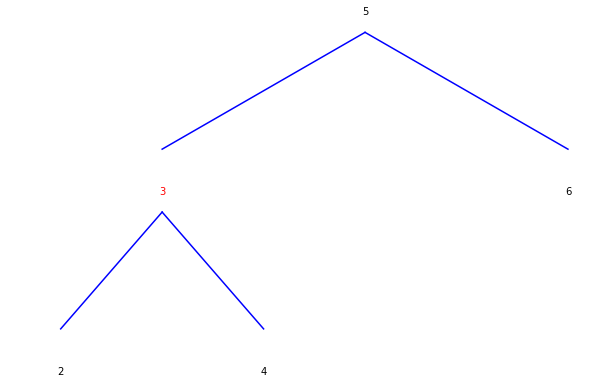

In [22]:
tree = RedBlackTrees()
for i in [1,2,5,4,6,3]:
    tree.insert(i)
tree.delete(1)
tree.plot_tree(tree.root)

In [11]:
count = 0
while (1):
    a = RedBlackTrees ()
    data = []
    for i in range (20):
        temp = random.randint (1, 1000)
        a.insert (temp)
        data.append (temp)
    
    if (a.integrity_check (debug=False) == False):
        print ("Insertion Failed\n")
        a.plot_tree (a.root)
        break
        
    a.delete (data[2])
    
    if (a.integrity_check (debug=True) == False):
        print ("Deletion Failed\n")
        print (data)
        a = RedBlackTrees ()
        for temp in data:
            a.insert (temp)
            
        a.plot_tree (a.root)
        a.delete (data[2])
        a.plot_tree (a.root)
        break
        
    count += 1
    if (count == 1000):
        print ("Sucessfully checked 1000 random trees")
        break

Sucessfully checked 1000 random trees


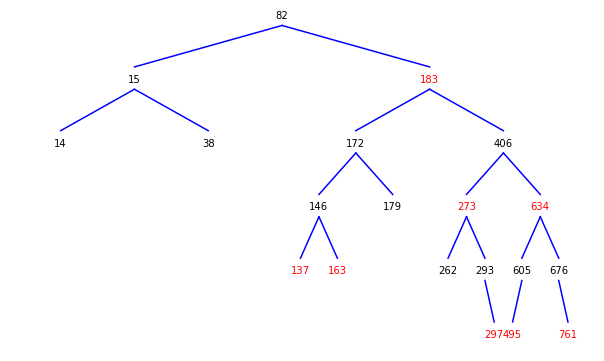

deleting:  15


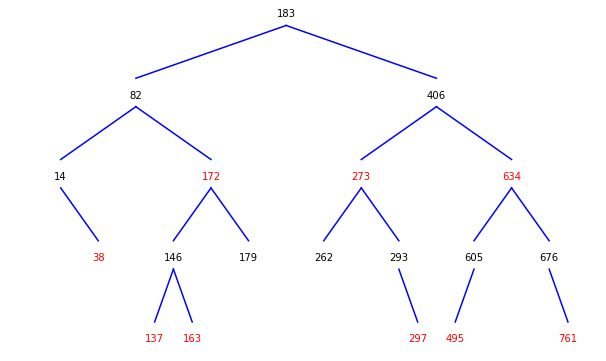

In [23]:
#data = [711, 803, 198, 884, 221, 810, 77, 413, 572, 649, 721, 528, 864, 833, 969, 529, 667, 593, 960, 722]
data = [128, 994, 983, 897, 972, 615, 194, 575, 690, 279, 866, 91, 491, 994, 343, 35, 512, 781, 545, 384]
data = [14, 82, 15, 406, 605, 38, 262, 634, 676, 183, 179, 163, 172, 273, 146, 293, 137, 297, 495, 761]
a = RedBlackTrees ()
for temp in data:
    a.insert (temp)
a.integrity_check (debug=False)
a.plot_tree (a.root)
a.delete (data[2])
print ('deleting: ',data[2])
a.integrity_check (debug=True)
a.plot_tree (a.root)

In [24]:
#Few helper fuctions for preformance measurement
def height_(node):
    if node == None:
        return 0
    hl = height_(node.left)
    hr = height_(node.right)
    if hl > hr:
        return hl+1
    else:
        return hr+1
    
def height(obj):
    if obj.root == None:
        return 0
    return height_(obj.root)-1

def insertn(obj, n):
    l = []
    for i in range(n):
        temp = random.randint(1,1000)
        obj.insert(temp)
        l.append (temp)
    return (l)
        
def searchnb(obj, l, n):
    for i in range(n):
        obj._search(obj.root, l[random.randint(1,n-1)])

def deleten (tree, u):
    for i in u:
        tree.delete (i)

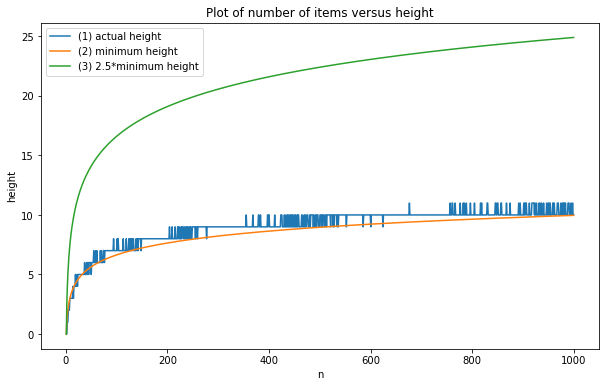

In [14]:
#Measuring the depth of the tree
import math

btree = RedBlackTrees()
h =[]
min_height = []
min_height_2 = []
n = []
for i in range(1,1000):
    n.append(i)
    btree = RedBlackTrees()
    for j in range (1,i):
        value = random.randint(0,1000)
        btree.insert(value)
    h.append(height(btree))
    min_height.append((math.log(i,2)))
    min_height_2.append((2.5*(math.log(i,2))))
plt.plot(n,h,label="(1) actual height")
plt.plot(n,min_height, label = "(2) minimum height")
plt.plot(n,min_height_2, label = "(3) 2.5*minimum height")
plt.legend()
plt.xlabel("n")
plt.ylabel("height")
plt.title("Plot of number of items versus height")
plt.show()

In [27]:
#Insert performance
u = []
for i in [100,1000,10000,100000]:
    print(i)
    tree = RedBlackTrees()
    u = insertn(tree, i)
    print (u)
    random.shuffle (u)
    %timeit deleten (tree, u)

100
[573, 597, 475, 824, 958, 595, 923, 496, 633, 344, 84, 414, 798, 968, 309, 898, 835, 377, 797, 725, 294, 595, 607, 297, 77, 176, 92, 592, 183, 825, 715, 655, 613, 647, 256, 620, 645, 792, 561, 599, 398, 82, 229, 339, 995, 27, 524, 10, 352, 355, 315, 7, 802, 931, 113, 242, 779, 137, 503, 723, 632, 540, 581, 385, 170, 97, 14, 538, 53, 966, 891, 217, 379, 671, 249, 375, 727, 422, 939, 603, 628, 553, 201, 682, 385, 141, 716, 663, 441, 937, 704, 294, 638, 381, 67, 637, 965, 727, 274, 339]
The slowest run took 30.90 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 34.2 µs per loop
1000
[297, 412, 602, 442, 438, 118, 705, 89, 405, 461, 253, 761, 356, 967, 211, 860, 359, 831, 465, 267, 497, 998, 169, 206, 134, 357, 789, 689, 170, 271, 580, 581, 862, 958, 503, 45, 283, 490, 229, 237, 665, 945, 132, 994, 25, 373, 865, 440, 423, 598, 220, 977, 326, 46, 62, 54, 380, 542, 239, 591, 780, 115, 598, 30, 617, 94, 345, 973, 183, 660,

The slowest run took 12.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 3.43 ms per loop
100000
[561, 808, 320, 208, 749, 612, 435, 131, 292, 537, 673, 121, 772, 853, 42, 322, 601, 952, 122, 607, 615, 857, 101, 929, 511, 704, 316, 434, 533, 897, 332, 332, 785, 232, 594, 584, 373, 875, 862, 148, 34, 322, 276, 898, 860, 691, 781, 708, 827, 657, 139, 690, 647, 528, 696, 466, 815, 125, 421, 140, 946, 301, 582, 146, 345, 892, 197, 979, 740, 186, 327, 952, 129, 267, 327, 149, 114, 735, 99, 467, 952, 583, 867, 166, 852, 82, 433, 775, 522, 334, 890, 183, 49, 983, 727, 837, 95, 879, 857, 222, 137, 30, 563, 506, 379, 48, 608, 859, 242, 321, 986, 881, 55, 465, 737, 225, 1, 559, 366, 748, 94, 537, 130, 53, 140, 284, 293, 464, 242, 985, 953, 522, 370, 202, 321, 242, 837, 425, 300, 799, 850, 936, 110, 851, 438, 689, 919, 181, 213, 881, 938, 727, 383, 603, 914, 502, 7, 942, 58, 289, 867, 181, 277, 588, 159, 941, 617, 157, 670, 889, 

10 loops, best of 3: 34.6 ms per loop


In [20]:
#Lookup performance
for i in [100,1000,10000,100000]:
    print (i)
    tree = RedBlackTrees()
    l = []
    for j in range(i):
        r = random.randint(1,i-10)
        l.append(r)
        tree.insert(r)
    %timeit searchnb(tree, l,i)

100
269 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1000
3.79 ms ± 58.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10000
49.1 ms ± 651 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
100000
677 ms ± 19.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


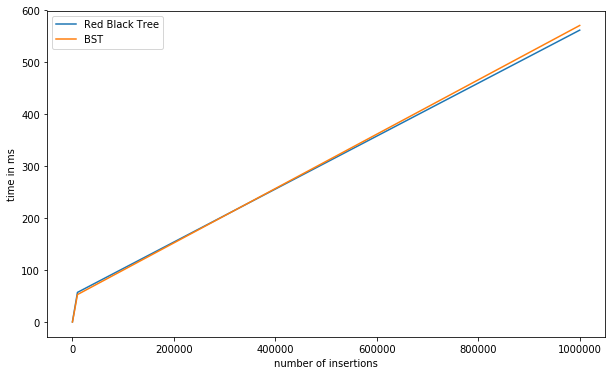

In [27]:
#Plot the performances
num_insert = [100, 1000, 10000, 1000000]
time_lookup1 = [0.621, 5.99, 57.4, 562]
time_lookup2 = [0.476, 4.88, 53.2, 571]

plt.plot (num_insert, time_lookup1, label="Red Black Tree")
plt.plot (num_insert, time_lookup2, label="BST")
plt.xlabel ('number of insertions')
plt.ylabel ('time in ms')
plt.legend ()
plt.show()

#Expected output:
#O(n * logn)

In [ ]:
[685, 662, 946, 430, 920, 893, 214, 395, 294, 237, 259, 801, 408, 521, 661, 750, 240, 800, 468, 381, 254, 480, 112, 249, 148, 427, 274, 471, 203, 920, 495, 382, 765, 224, 115, 974, 595, 908, 79, 988, 38, 285, 756, 392, 710, 97, 391, 568, 460, 593, 148, 158, 781, 317, 150, 310, 142, 143, 276, 597, 588, 842, 227, 335, 714, 260, 773, 496, 120, 484, 573, 128, 501, 914, 403, 407, 4, 167, 910, 641, 715, 626, 582, 950, 772, 619, 469, 622, 137, 967, 125, 665, 404, 290, 380, 316, 311, 204, 852, 179]